In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ue19cs312-assignment/sample_submission.csv
/kaggle/input/ue19cs312-assignment/submission.csv
/kaggle/input/ue19cs312-assignment/train.csv
/kaggle/input/ue19cs312-assignment/test.csv


# Import Statements

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Loading train and test data  

In [3]:
#df_train saved as df
#dataset 1
df = pd.read_csv("/kaggle/input/ue19cs312-assignment/train.csv")
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
t_1 = list(range(1,1501))
df['t'] = t_1

#dataset 2
df_train = pd.read_csv("/kaggle/input/ue19cs312-assignment/train.csv")
df_test = pd.read_csv("/kaggle/input/ue19cs312-assignment/test.csv")

# Exploratory Data Analysis

In [4]:
print(df_train.shape)
df_train.head()

(1500, 6)


,Date,Open,High,Low,Volume,Close
0,14-08-2015,57.484790,58.398406,57.342469,171718000,58.237720
1,17-08-2015,58.274453,59.013611,58.026536,163538800,58.788651
2,18-08-2015,58.453501,58.917197,58.260678,138242800,58.485638
3,19-08-2015,58.301997,58.494820,57.650069,193146000,57.801575
4,20-08-2015,57.374601,57.498558,56.249794,274006400,56.718082


In [5]:
print(df_test.shape)
df_test.head()

(30, 6)


,Date,Open,High,Low,Volume,Close
0,30-07-2021,293.328006,297.222166,292.788806,70382000,NaN
1,02-08-2021,297.282094,298.460321,295.065414,62880000,NaN
2,03-08-2021,296.183715,300.637034,294.925590,64786600,NaN
3,04-08-2021,299.099384,300.137807,297.122335,56368300,NaN
4,05-08-2021,298.520228,300.237657,296.902657,46397700,NaN


## Checking for NaN values

In [6]:
nan_columns = df_train.isnull().sum()

No null values exist 

In [7]:
X_columns_date = ['Date', 'Open', 'High', 'Low', 'Volume']
X_columns = ['Open', 'High', 'Low', 'Volume']

## Checking for outliers

In [8]:
def plotboxplot(col_name):
    values=df_train[col_name].values
    plt.boxplot(x=values)
    plt.title(col_name)
    plt.show()
def plothist(col_name):
    values=df_train[col_name].values
    plt.hist(x=values)
    plt.title(col_name)
    plt.show()

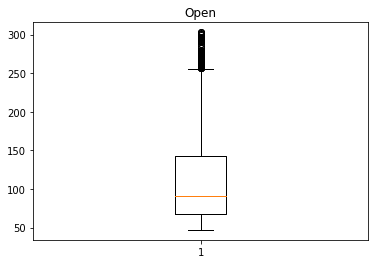

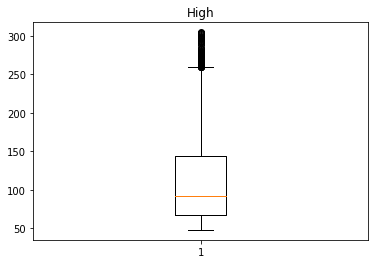

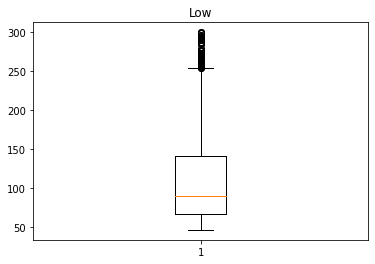

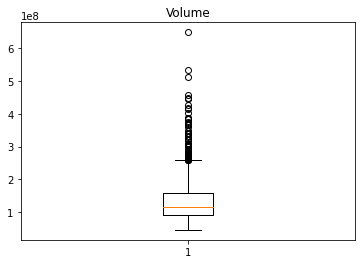

In [9]:
for i in X_columns:
    plotboxplot(i)

Since it is possible for outliers to be legitimate values, we choose not to remove them.

## Scaling and Normalising

In [10]:
scaler=StandardScaler()
normalizer=Normalizer()

In [11]:
X_values=df_train[X_columns].values
X_values_date=df_train[X_columns_date].values

In [12]:
pipe=Pipeline([("scaler",scaler),("normalizer",normalizer)])
pipe.fit(X_values)
X_transformed=pipe.transform(X_values)

X_transformed is the scaled and normalised data

## Correlation Analysis

In [13]:
df_train.corr()

,Open,High,Low,Volume,Close
Open,1.000000,0.999822,0.999744,-0.162110,0.999575
High,0.999822,1.000000,0.999684,-0.155877,0.999777
Low,0.999744,0.999684,1.000000,-0.170326,0.999782
Volume,-0.162110,-0.155877,-0.170326,1.000000,-0.163713
Close,0.999575,0.999777,0.999782,-0.163713,1.000000


lots of correlated data is present, which might be due to confounding variables, so we try PCA

open/high/low-confounding variable

## PCA

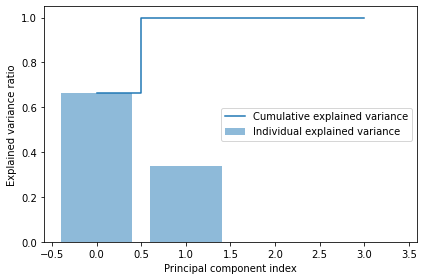

In [14]:
pca = PCA()

X_train_pca = pca.fit_transform(X_transformed)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

2 components explain all the data

### Normalised and scalarised PCA data

In [15]:
pipe_pca=Pipeline([("scaler",scaler),("normalizer",normalizer),("pca",PCA(n_components=2))])
pipe_pca.fit(X_values)
X_pca=pipe_pca.transform(X_values)

In [16]:
print(X_pca)

[[-0.64025536  0.49580735]
 [-0.66703981  0.4287699 ]
 [-0.72164234  0.18061479]
 ...
 [ 1.26310574 -0.05789058]
 [ 1.26894663 -0.01245467]
 [ 1.22498894 -0.21878907]]


# Visualisation

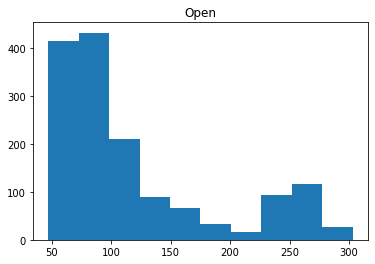

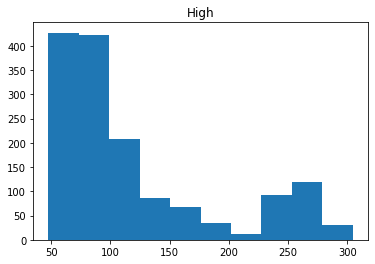

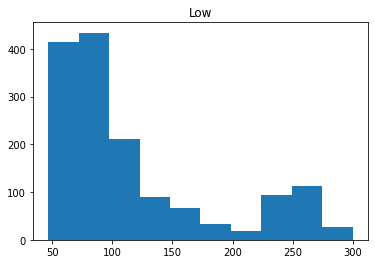

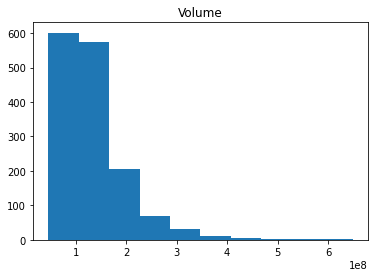

In [17]:
for i in X_columns:
    plothist(i)

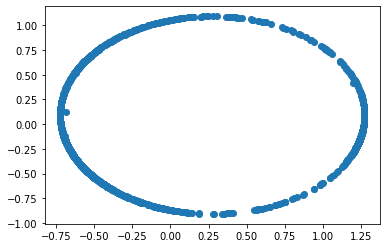

In [18]:
plt.scatter(X_pca[:,0],X_pca[:,1])

Data values repeat after a time, can't fit straight line through it

array([[5.74847899e+01, 5.83984063e+01, 5.73424687e+01, 1.71718000e+08],
       [5.82744525e+01, 5.90136106e+01, 5.80265359e+01, 1.63538800e+08],
       [5.84535005e+01, 5.89171967e+01, 5.82606776e+01, 1.38242800e+08],
       ...,
       [3.02793811e+02, 3.02973565e+02, 2.95664509e+02, 1.04818600e+08],
       [2.94186727e+02, 2.98500271e+02, 2.89653510e+02, 1.18931200e+08],
       [2.93947087e+02, 2.97661523e+02, 2.93727415e+02, 5.66995000e+07]])

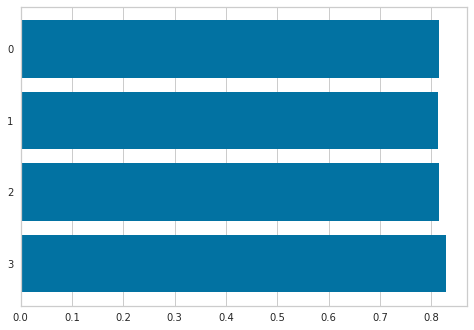

In [19]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X_values, df_train["Close"].values)           # Fit the data to the visualizer
visualizer.transform(X_values)        # Transform the data

array([[5.74847899e+01, 5.83984063e+01, 5.73424687e+01, 1.71718000e+08],
       [5.82744525e+01, 5.90136106e+01, 5.80265359e+01, 1.63538800e+08],
       [5.84535005e+01, 5.89171967e+01, 5.82606776e+01, 1.38242800e+08],
       ...,
       [3.02793811e+02, 3.02973565e+02, 2.95664509e+02, 1.04818600e+08],
       [2.94186727e+02, 2.98500271e+02, 2.89653510e+02, 1.18931200e+08],
       [2.93947087e+02, 2.97661523e+02, 2.93727415e+02, 5.66995000e+07]])

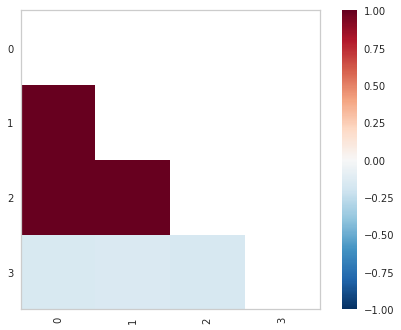

In [20]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X_values, df_train["Close"].values)           # Fit the data to the visualizer
visualizer.transform(X_values)        # Transform the data

FeatureCorrelation(ax=<AxesSubplot:>, labels=['Open', 'High', 'Low', 'Volume'])

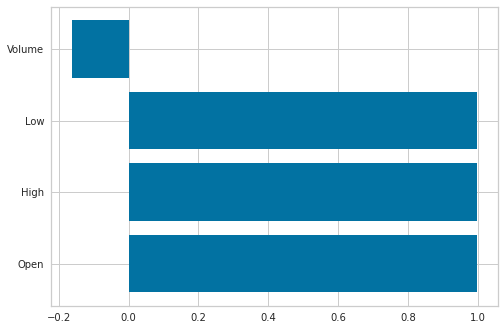

In [21]:
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation(labels=X_columns)
visualizer.fit(X_values,df_train["Close"].values)        # Fit the data to the visualizer

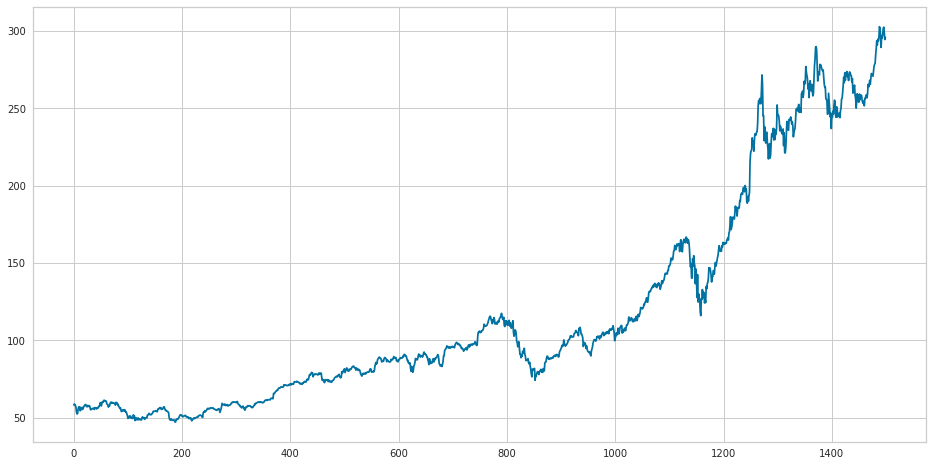

In [22]:
plt.figure(figsize=(16,8))
plt.plot(df_train['Close'], label='Close Price')

numpy.ndarray

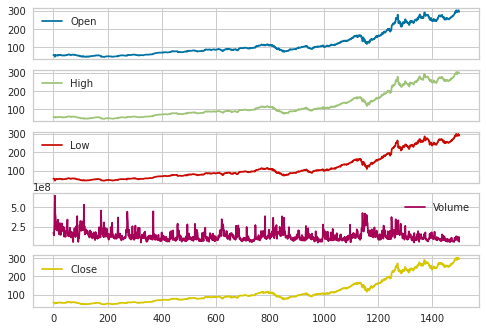

In [23]:
axes = df_train.plot.line(subplots=True)
type(axes)

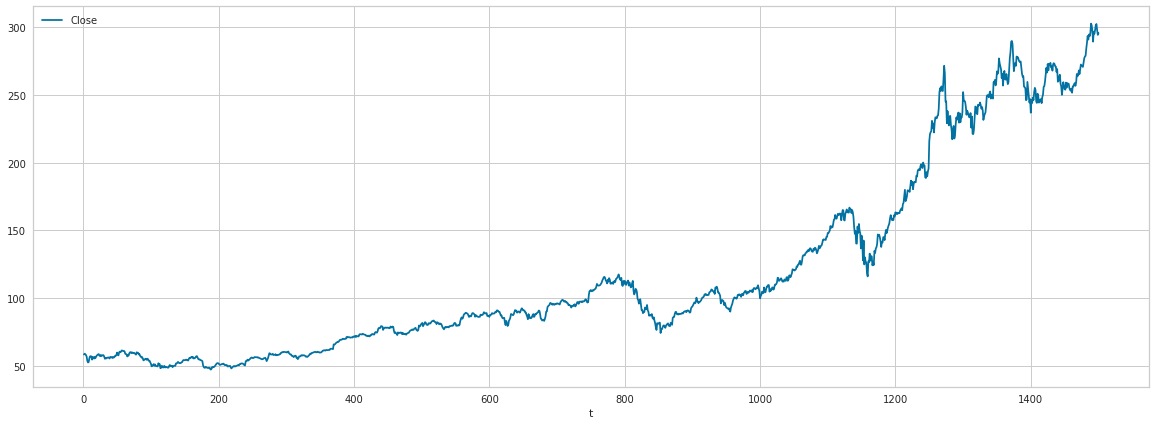

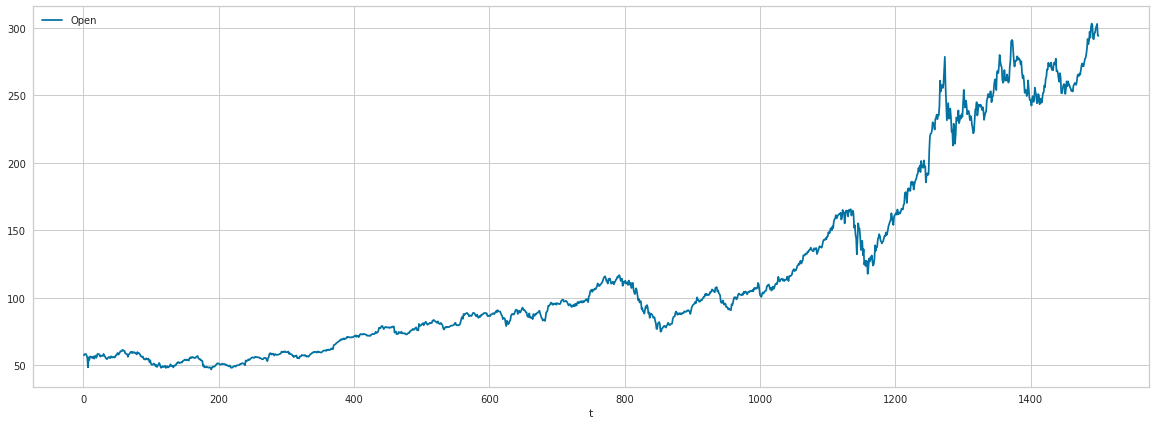

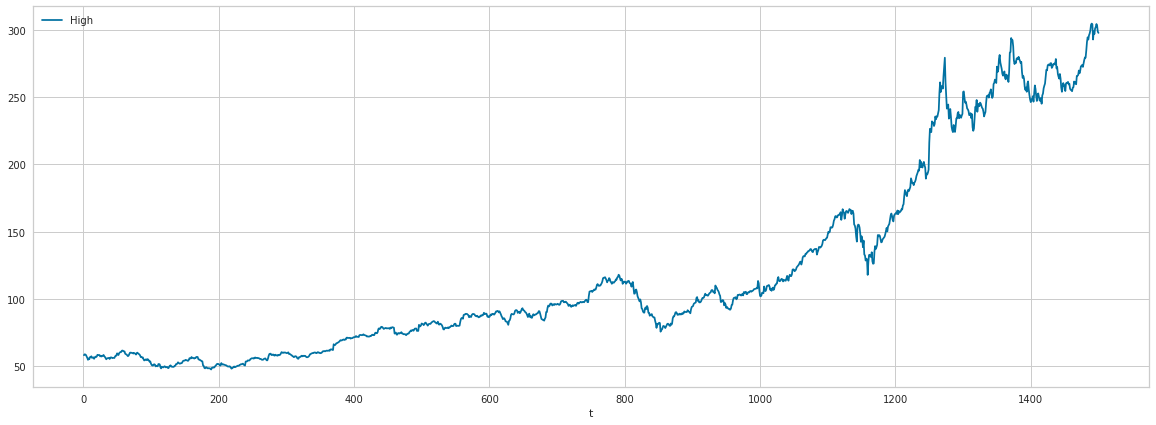

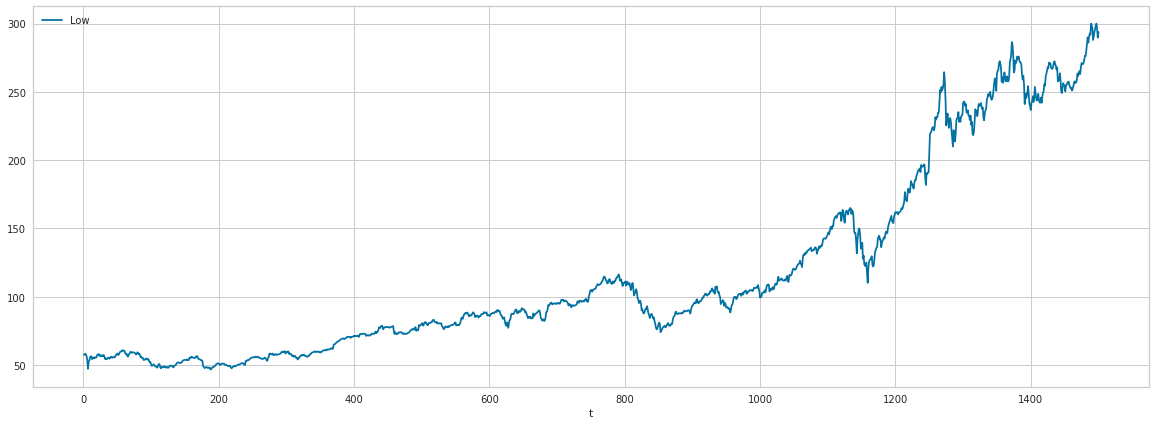

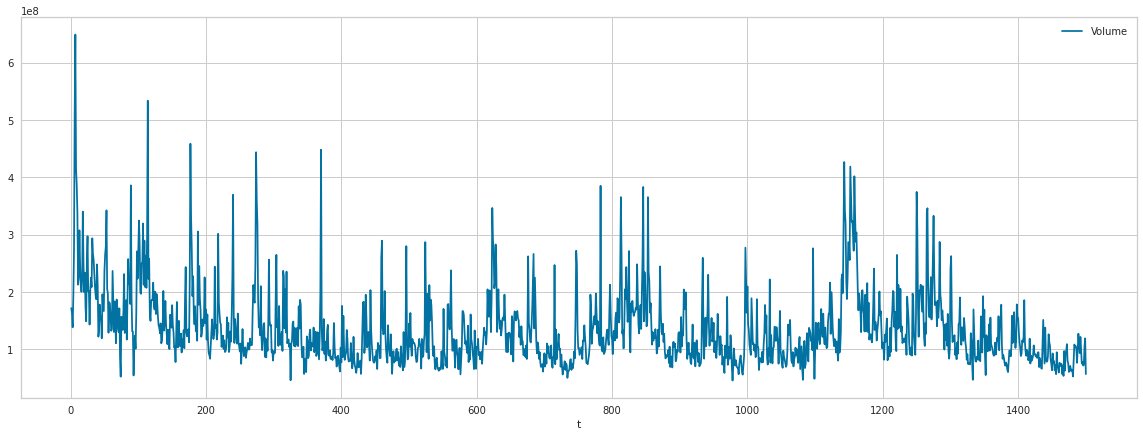

In [24]:
graphs = []
graphs.append(df.plot.line(x='t', y='Close', figsize=(20,7)))
graphs.append(df.plot.line(x='t', y='Open', figsize=(20,7)))
graphs.append(df.plot.line(x='t', y='High', figsize=(20,7)))
graphs.append(df.plot.line(x='t', y='Low', figsize=(20,7)))
graphs.append(df.plot.line(x='t', y='Volume', figsize=(20,7)))

Column 'Close' has been zoomed in for detailed inspection

<AxesSubplot:xlabel='t'>

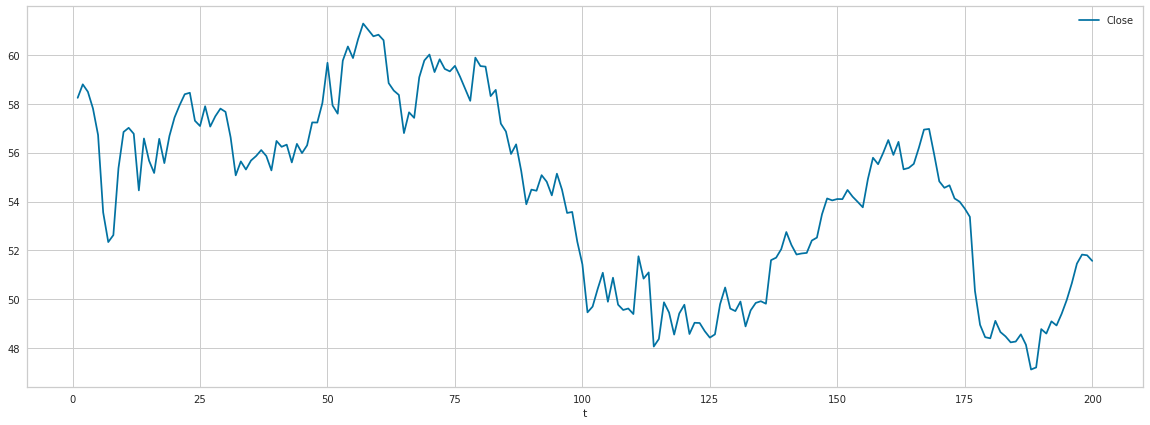

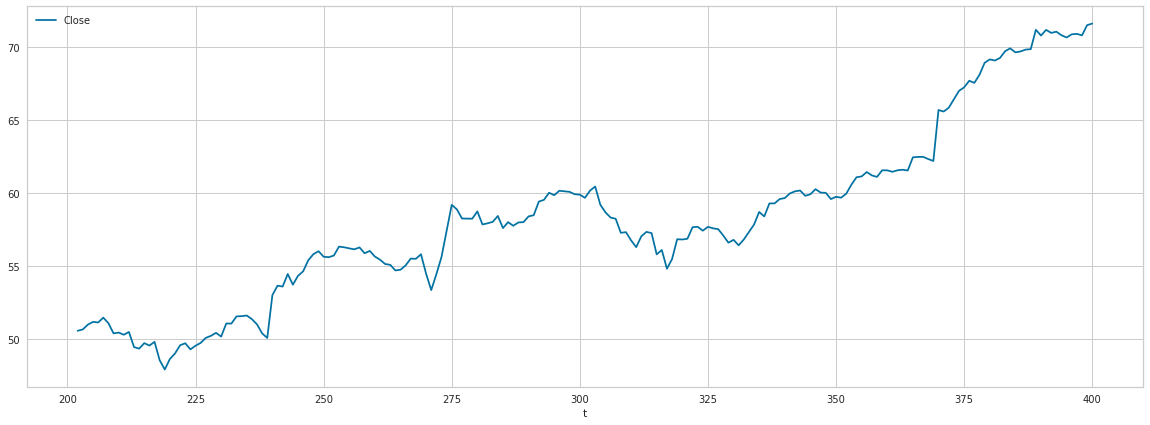

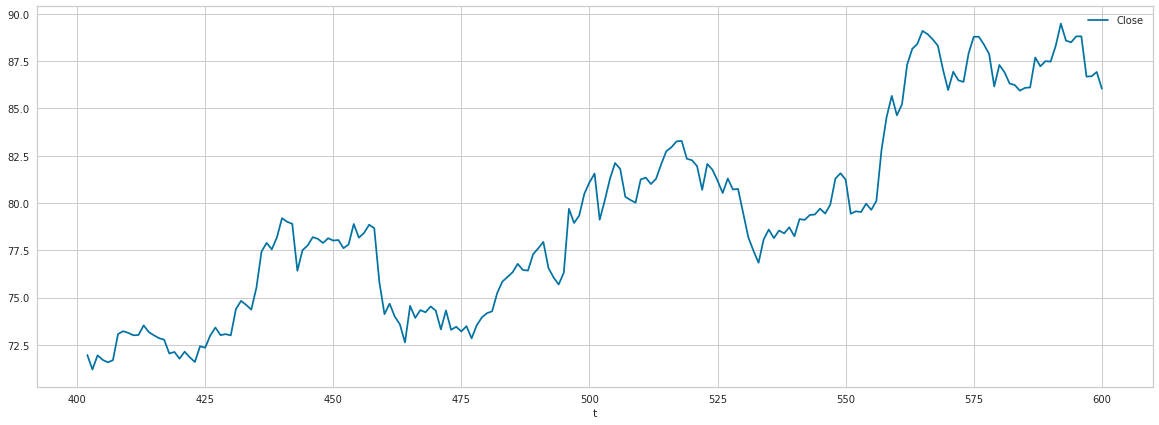

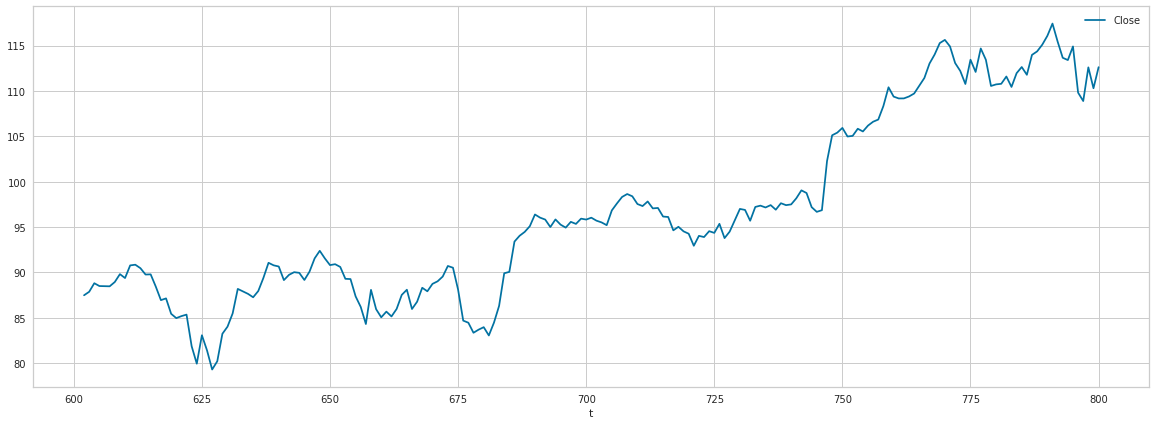

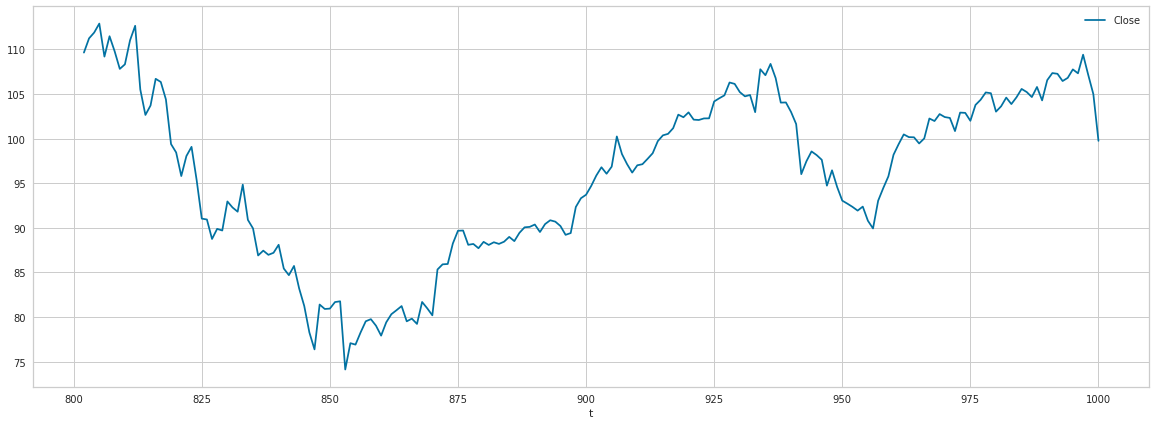

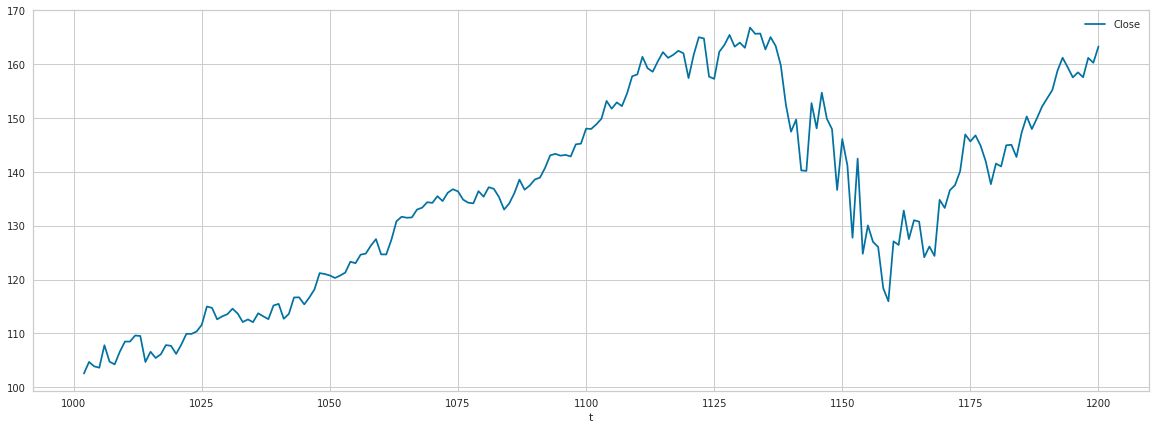

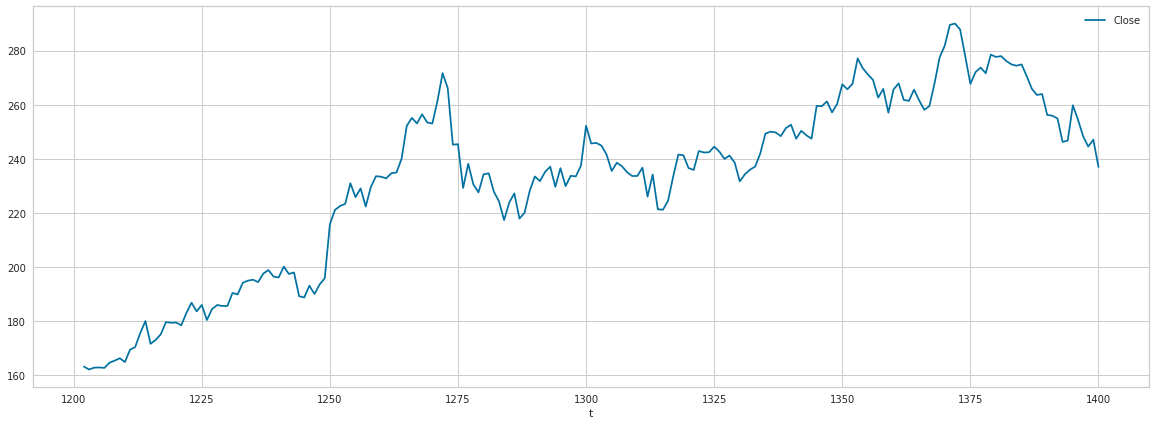

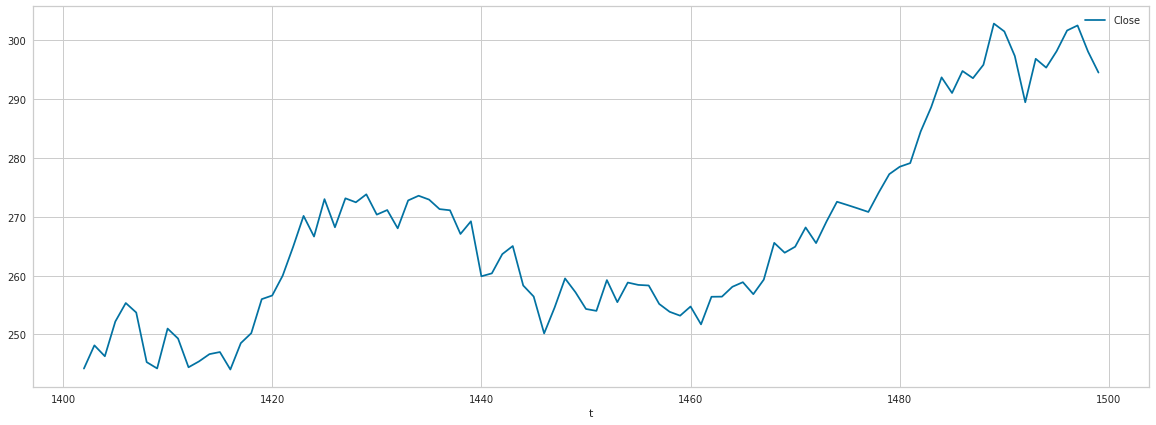

In [25]:
df.iloc[:200,:].plot.line(x='t', y='Close', figsize=(20,7))
df.iloc[201:400,:].plot.line(x='t', y='Close', figsize=(20,7))
df.iloc[401:600,:].plot.line(x='t', y='Close', figsize=(20,7))
df.iloc[601:800,:].plot.line(x='t', y='Close', figsize=(20,7))
df.iloc[801:1000,:].plot.line(x='t', y='Close', figsize=(20,7))
df.iloc[1001:1200,:].plot.line(x='t', y='Close', figsize=(20,7))
df.iloc[1201:1400,:].plot.line(x='t', y='Close', figsize=(20,7))
df.iloc[1401:1499,:].plot.line(x='t', y='Close', figsize=(20,7))

# Regression

In [26]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import chi2_kernel, rbf_kernel, linear_kernel, polynomial_kernel, sigmoid_kernel
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
X_columns = ['Open', 'High', 'Low', 'Volume']
X_values = df_train[X_columns].values
X_test_values=df_test[X_columns].values
y_values= df_train["Close"].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.15, random_state=0)

Uncomment whatever model needs to be used for Gridsearch

In [29]:
# def getLinearRegressorConfig():
#     model = LinearRegression(n_jobs=-1)
#     parameters = {
#         "positive": [True, False]
#     }
#     return model, parameters

# def getRidgeRegressorConfig():
#     # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
#     model = Ridge(random_state=0, max_iter=None)
#     parameters = {
#         "alpha": np.arange(0.1, 3.1, 0.1),
#         "positive": [True, False],
# #         "solver": ["svd", "cholesky", ]
#     }
#     return model, parameters
# def getLassoRegressorConfig():
#     model = Lasso(random_state=0, max_iter=10000)
#     parameters = {
#         "alpha": np.arange(0.1, 3.1, 0.1),
# #         "precompute": ["auto", True, False],
#         "tol": [1e-4, 1e-3, 1e-2, 1e-1, 0, 1e1, 1e2, 1e3],
#         "positive": [True, False],
#         "selection": ["cyclic", "random"]
#     }
#     return model, parameters

# def getKernelRidgeRegressorConfig():
#     model = KernelRidge()
#     parameters = {
#         "alpha": np.arange(0.1, 3.1, 0.1),
#         "kernel": ["linear", rbf_kernel, polynomial_kernel, sigmoid_kernel, chi2_kernel],
#         "gamma": np.arange(0.1, 3.1, 0.1),
#         "degree": [3, 4, 5]
#     }
#     return model, parameters

# def getSVMRegressorConfig():
#     model = SVR(max_iter=10000)
#     parameters = {
#         "epsilon": np.arange(0.1, 3.1, 0.1),
#         "tol": [1e-4, 1e-3, 1e-2, 1e-1, 0, 1e1, 1e2, 1e3],
#         "C": np.arange(0.1, 3.1, 0.1),
#         "kernel":["rbf","poly","linear","sigmoid","precomputed"],
# 	"degree":[3,4,5]
#     }
#     return model, parameters

# def getKNeighboursRegressorConfig():
#     model = KNeighborsRegressor(n_jobs=-1, p=2)
#     parameters = {
#         "n_neighbors": [3, 4, 5, 6, 7, 8],
#         "weights": ["uniform", "distance"],
#         "algorithm": ["ball_tree", "kd_tree", "brute"]
#         # "leaf_size": [25, 30, 35, 40, 45, 50]
#     }
#     return model, parameters

In [30]:
functions = [name for (name, thing) in locals().items() if callable(thing)]
model_functions = [eval(function) for function in functions if function.endswith("RegressorConfig")]
model_functions

[]

In [31]:
# for model_function in model_functions:
#     try:
#         model, parameters = model_function()
#         search = GridSearchCV(model, parameters, n_jobs=-1, refit=True)
#         search.fit(X_train, y_train)
#         print(search.best_params_, search.best_score_)
#     except Exception as error_message:
#         print(f"Error in model {model_function}: {error_message}")

Best parameters from gridsearch results

In [32]:
def getLinearRegressorConfigTrained():
    model=LinearRegression()
    return model

# def getRidgeRegressorConfigTrained():
#     # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
#     model = Ridge(random_state=0, max_iter=None, alpha=3.0000000000000004, positive= False)
#     return model

# def getLassoRegressorConfigTrained():
#     model = Lasso(random_state=0, max_iter=10000,alpha=0.1, positive=False, selection="cyclic",tol=0)
#     return model
# def getKernelRidgeRegressorConfigTrained():
#     model = KernelRidge(alpha=0.7000000000000001,degree=3, gamma=0.1, kernel="linear")
#     return model

# def getKNeighboursRegressorConfigTrained():
#     model = KNeighborsRegressor(n_jobs=-1, p=2,algorithm="ball_tree",n_neighbors=8, weights="uniform")
#     return model

In [33]:
functions = [name for (name, thing) in locals().items() if callable(thing)]
model_functions = [eval(function) for function in functions if function.endswith("RegressorConfigTrained")]

In [34]:
model_functions

[<function __main__.getLinearRegressorConfigTrained()>]

In [35]:
for model in model_functions:
    model=model()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test_values)
    df_submission=pd.read_csv("/kaggle/input/ue19cs312-assignment/sample_submission.csv")
    df_submission["Close"]=y_pred
    df_submission.to_csv(f"submission_{model}.csv",index=False)

Code for scaling, and then linear regression

In [36]:
from sklearn.decomposition import TruncatedSVD

In [37]:
scaler_X = StandardScaler()
pca = PCA(n_components=2)  # did not help, do not try
svd= TruncatedSVD(n_components=2)
preprocessing_pipe_X = Pipeline([("scaler", scaler_X),("pca",pca)]) 
preprocessing_pipe_X.fit(X_values)
scaler_y = StandardScaler()
y_values=df_train["Close"].values
preprocessing_pipe_y = Pipeline([("scaler", scaler_y)]) 
preprocessing_pipe_y.fit(y_values.reshape(-1, 1))
X_transformed = preprocessing_pipe_X.transform(X_values)
X_transformed_test = preprocessing_pipe_X.transform(X_test_values)
y_transformed = preprocessing_pipe_y.transform(y_values.reshape(-1, 1))

In [38]:
linear=LinearRegression()
linear.fit(X_transformed,y_transformed)
predictions=linear.predict(X_transformed_test)
predictions = np.asarray(predictions)
predictions = preprocessing_pipe_y.inverse_transform(predictions)
df_submission=pd.read_csv("/kaggle/input/ue19cs312-assignment/sample_submission.csv")
df_submission["Close"]=predictions
df_submission.to_csv("submission_transformed_linear.csv",index=False)

We made multiple submissions for all regression models. With preprocessing- scaling or normalizing values or both. We tried the same with PCA as well using 2 components. In the end Linear Regression worked out the best with the least RMSE.

# Time Series Models

In [39]:
!pip install --upgrade pmdarima

     |████████████████████████████████| 1.4 MB 895 kB/s eta 0:00:01


## ACF, PACF

In [40]:
!pip install statsmodels

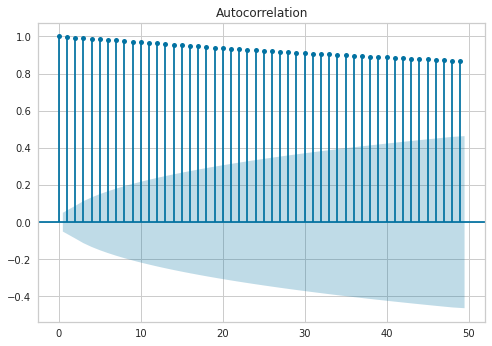

In [41]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Close'], lags = range(0,50))
plt.show()

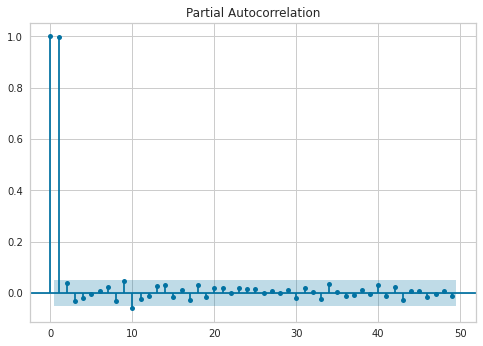

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Close'], lags = range(0,50))
plt.show()

## Augmented Dickey Fuller

In [43]:
from statsmodels.tsa.stattools import adfuller

print("p-value:", adfuller(df['Close'].dropna())[1])

p-value: 0.9968471679199324


p > 0.05: Failed the ADF test for stationary data

## Differencing

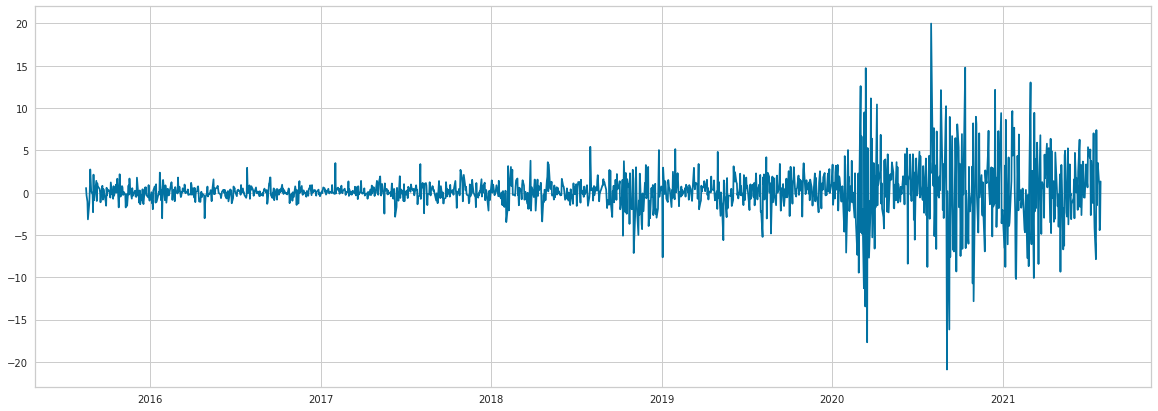

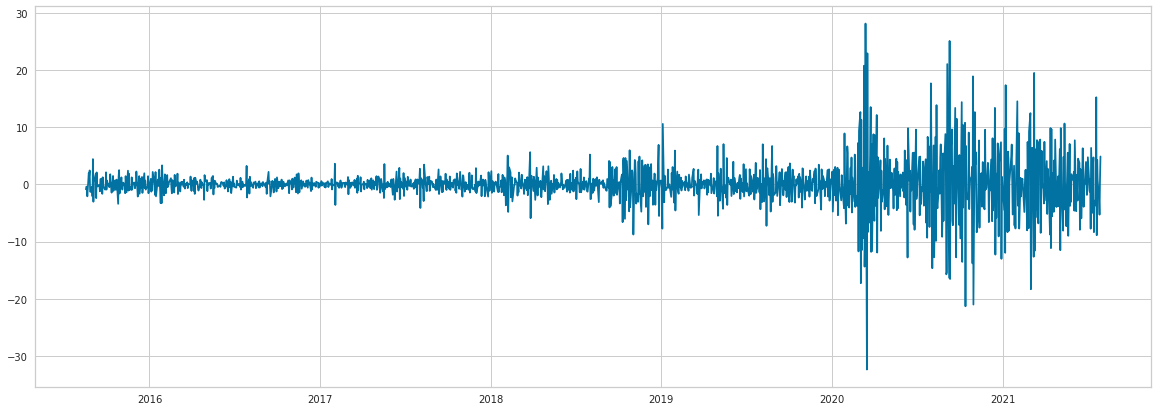

In [44]:
diff = df['Close'].diff()
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot(diff)
plt.show()

diff2 = diff.diff()
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot(diff2)
plt.show()

In [45]:
diff


Date
2015-08-14         NaN
2015-08-17    0.550930
2015-08-18   -0.303013
2015-08-19   -0.684063
2015-08-20   -1.083492
                ...   
2021-07-23    3.514740
2021-07-26    0.858734
2021-07-27   -4.433380
2021-07-28   -3.574646
2021-07-29    1.318024
Name: Close, Length: 1500, dtype: float64

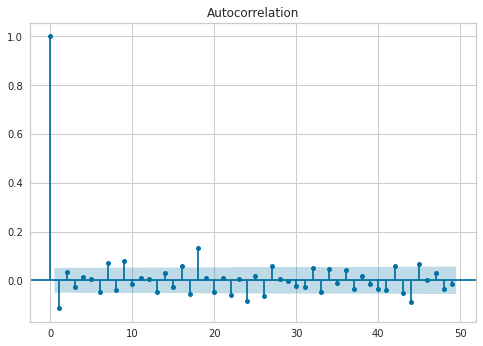

In [46]:
plot_acf(diff.iloc[1:], lags = range(0,50))
plt.show()

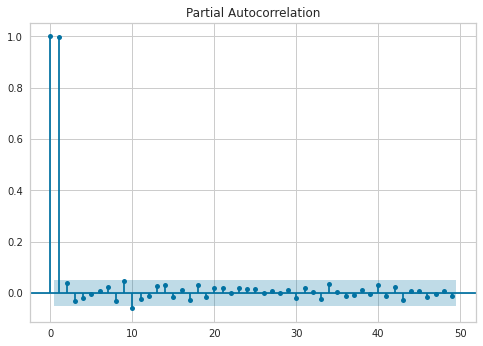

In [47]:
plot_pacf(df['Close'], lags = range(0,50))
plt.show()

**Therefore, p=2, d=1, q=2**

In [48]:
from statsmodels.tsa.stattools import adfuller

print("p-value:", adfuller(diff.iloc[1:].dropna())[1])

p-value: 1.6167775105386145e-12


p < 0.05: Passed ADF

**Since data is non-stationary, we cannot use AR, MA or ARMA models. Since first order differencing passed the Augmented Dickey Fuller test, we will go for ARIMA and SARIMAX with first order differencing.**

## ARIMA

Based on the above tests, we will try ARIMA for (2,1,2)

In [49]:
#ARIMA(2,1,2) on 1450 data points
train = df.iloc[:1450,:]
test = df.iloc[1451:1499,:]

In [50]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(2,1,2))
model_fit=model.fit()
model_fit.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1450
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3474.157
Date:                Sat, 06 Nov 2021   AIC                           6958.314
Time:                        18:47:43   BIC                           6984.708
Sample:                             0   HQIC                          6968.164
                               - 1450                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8700      0.003   -571.172      0.000      -1.876      -1.864
ar.L2         -0.9925      0.003   -310.301      0.000      -0.999      -0.986
ma.L1          1.8602      0.007    281.467      0.000       1.847       1.873
ma.L2          0.9755      0.006    152.814      0.000       0.963       0.988
sigma2         7.0747      0.108     65.313      0.000       6.862       7.287
===================================================================================
Ljung-Box (L1) (Q):                   8.14   Jarque-Bera (JB):              7307.28
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              32.22   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1450    253.847759
1451    253.978077
1452    254.209463
1453    253.647438
1454    254.468776
1455    253.490674
1456    254.504564
1457    253.579332
1458    254.303256
1459    253.867786
1460    253.963642
1461    254.216580
1462    253.648456
1463    254.459809
1464    253.506431
1465    254.483998
1466    253.602153
1467    254.280993
1468    253.886769
1469    253.950239
1470    254.222803
1471    253.650121
1472    254.450520
1473    253.522150
1474    254.463823
1475    253.624279
1476    254.259640
1477    253.904739
1478    253.937828
1479    254.228179
1480    253.652387
1481    254.440947
1482    253.537801
1483    254.444056
1484    253.645711
1485    254.239182
1486    253.921726
1487    253.926367
1488    254.232751
1489    253.655210
1490    254.431129
1491    253.553359
1492    254.424708
1493    253.666451
1494    254.219600
1495    253.937760
1496    253.915817
1497    254.236565
Name: ARIMA predictions, dtype: float64

In [52]:
print(mean_squared_error(test['Close'], pred))

751.8145342055979


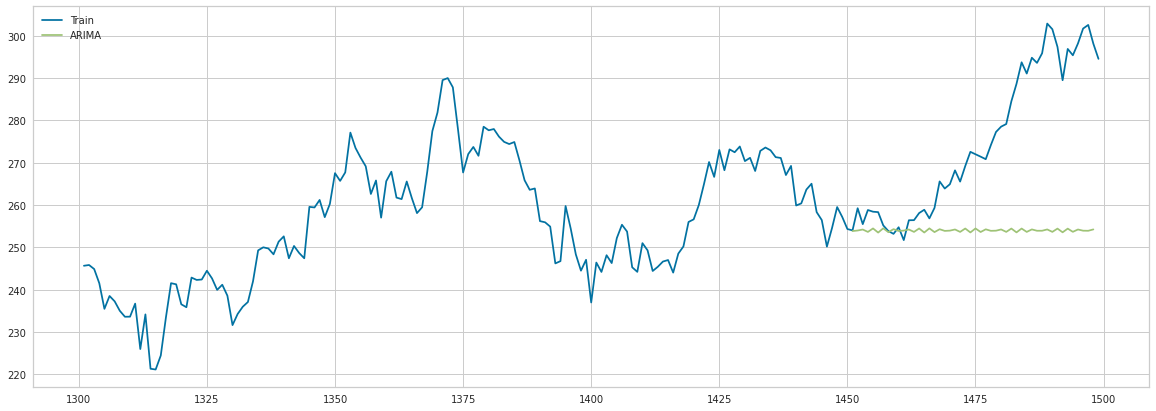

In [53]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot( df.iloc[1300:1499,:]['t'],df.iloc[1300:1499,:]['Close'], label='Train')
plt.plot(list(range(1451,1499)),pred, label='ARIMA')
plt.legend(loc='best')

In [54]:
#ARIMA (2,1,2) on 450 data points
train = df.iloc[1000:1450,:]
test = df.iloc[1451:1499,:]

In [55]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(2,1,2))
model_fit=model.fit()
model_fit.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  450
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1311.617
Date:                Sat, 06 Nov 2021   AIC                           2633.234
Time:                        18:47:44   BIC                           2653.770
Sample:                             0   HQIC                          2641.329
                                - 450                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0863     77.787     -0.001      0.999    -152.546     152.374
ar.L2          0.1162     29.749      0.004      0.997     -58.190      58.423
ma.L1         -0.0424     77.784     -0.001      1.000    -152.496     152.411
ma.L2         -0.0783     19.744     -0.004      0.997     -38.775      38.619
sigma2        20.1756      0.875     23.054      0.000      18.460      21.891
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               184.78
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               3.08   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


450    254.585009
451    254.487515
452    254.525957
453    254.511317
454    254.517045
455    254.514851
456    254.515705
457    254.515377
458    254.515504
459    254.515455
460    254.515474
461    254.515467
462    254.515470
463    254.515469
464    254.515469
465    254.515469
466    254.515469
467    254.515469
468    254.515469
469    254.515469
470    254.515469
471    254.515469
472    254.515469
473    254.515469
474    254.515469
475    254.515469
476    254.515469
477    254.515469
478    254.515469
479    254.515469
480    254.515469
481    254.515469
482    254.515469
483    254.515469
484    254.515469
485    254.515469
486    254.515469
487    254.515469
488    254.515469
489    254.515469
490    254.515469
491    254.515469
492    254.515469
493    254.515469
494    254.515469
495    254.515469
496    254.515469
497    254.515469
Name: ARIMA predictions, dtype: float64

In [57]:
print(mean_squared_error(test['Close'], pred))

730.1080337091198


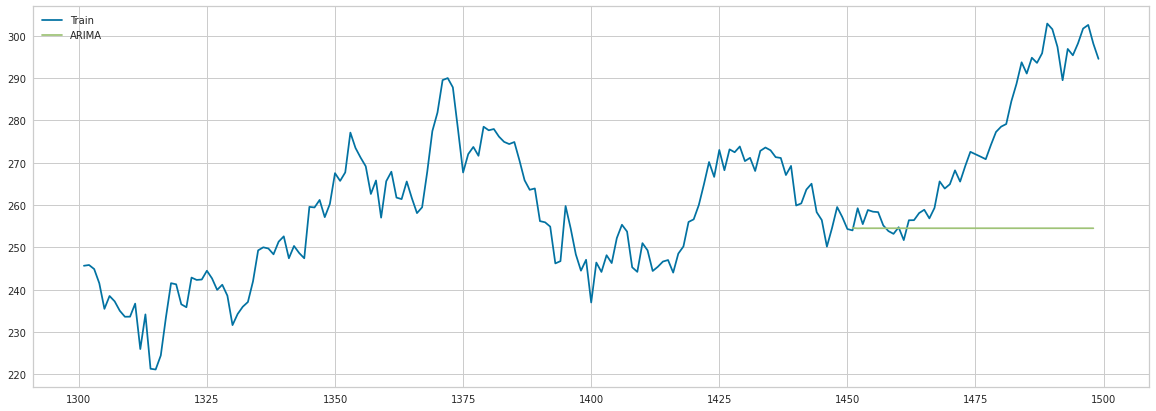

In [58]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot( df.iloc[1300:1499,:]['t'],df.iloc[1300:1499,:]['Close'], label='Train')
plt.plot(list(range(1451,1499)),pred, label='ARIMA')
plt.legend(loc='best')

## SARIMAX

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### SARIMAX for m=12 (12 months a year)

The following code performs stepwise search to minimise AIC

In [60]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['Close'], start_p = 0, start_q = 0,
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=2.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8229.350, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7877.540, Time=0.82 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8217.457, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7632.358, Time=1.84 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.86 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7645.597, Time=1.23 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=7634.045, Time=2.37 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=7633.887, Time=3.08 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=7632.868, Time=1.72 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=7635.846, Time=5.93 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=7634.312, Time=6.84 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1500
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -3812.179
Date:                            Sat, 06 Nov 2021   AIC                           7632.358
Time:                                    18:48:30   BIC                           7653.576
Sample:                                         0   HQIC                          7640.266
                                           - 1500                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1011      0.014     -7.039      0.000      -0.129      -0.073
ar.S.L12      -0.6374      0.014    -45.105      0.000      -0.665      -0.610
ar.S.L24      -0.3946      0.013    -30.041      0.000      -0.420      -0.369
sigma2         9.8241      0.162     60.817      0.000       9.507      10.141
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6097.15
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              31.53   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**The above test gives (1,1,0)(2,1,0)[12] as the best result for m=12**

Therefore, we use these parameters for the model shown below

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53203D+00    |proj g|=  9.33882D-02


 This problem is unconstrained.



At iterate    5    f=  2.49227D+00    |proj g|=  1.51589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     11      1     0     0   1.388D-06   2.492D+00
  F =   2.4922690576535524     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


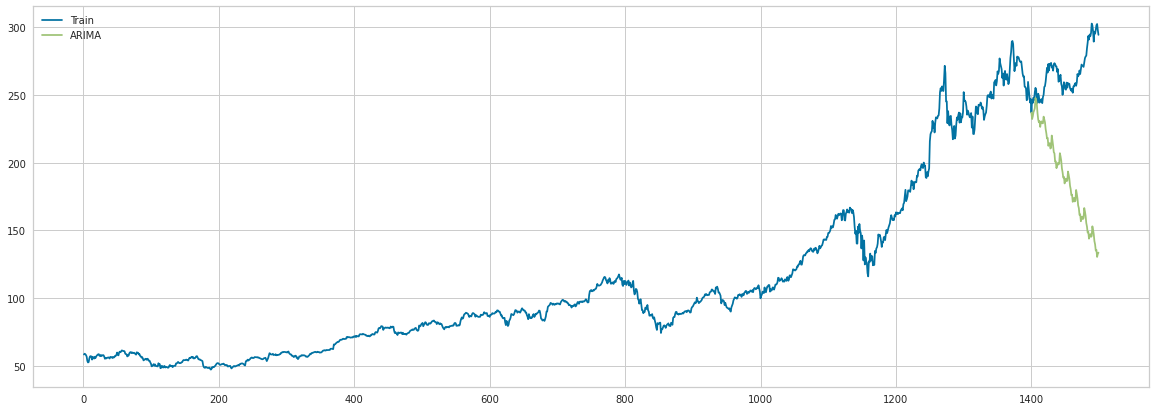

In [61]:
warnings.filterwarnings("ignore")

train = df[:1400]
test = df[1400:]
model = SARIMAX(train['Close'], 
                order = (1, 1, 0), 
                seasonal_order =(2, 1, 0, 12))
  
result = model.fit()
result.summary()


start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot( df.iloc[:1499,:]['t'],df.iloc[:1499,:]['Close'], label='Train')
plt.plot(list(range(1400,1500)),predictions, label='ARIMA')
plt.legend(loc='best')

### SARIMAX for m=5 (5 working days a week)

In [62]:
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to dataset
stepwise_fit = auto_arima(train['Close'], start_p = 0, start_q = 0,
                          max_p = 3, max_q = 3, m = 5, 
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[5] intercept   : AIC=8696.962, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=8696.074, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=7149.650, Time=1.07 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=7902.960, Time=0.99 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=8715.258, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=7454.000, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[5] intercept   : AIC=7038.130, Time=1.70 sec
 ARIMA(1,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=5.44 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=3.53 sec
 ARIMA(0,0,0)(2,1,0)[5] intercept   : AIC=8695.909, Time=1.27 sec
 ARIMA(2,0,0)(2,1,0)[5] intercept   : AIC=7031.757, Time=2.46 sec
 ARIMA(2,0,0)(1,1,0)[5] intercept   : AIC=7147.799, Time=1.19 sec
 ARIMA(2,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=8.16 sec
 ARIMA(2,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=4.69 sec
 ARIMA(3,0,0)(2,1,0)[5] intercept   : AIC=7025.742, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1400
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 5)   Log Likelihood               -3505.871
Date:                           Sat, 06 Nov 2021   AIC                           7025.742
Time:                                   18:49:39   BIC                           7062.426
Sample:                                        0   HQIC                          7039.458
                                          - 1400                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1202      0.081      1.482      0.138      -0.039       0.279
ar.L1          0.8288      0.015     55.459      0.000       0.800       0.858
ar.L2          0.1438      0.017      8.653      0.000       0.111       0.176
ar.L3         -0.0764      0.012     -6.169      0.000      -0.101      -0.052
ar.S.L5       -0.6296      0.012    -52.341      0.000      -0.653      -0.606
ar.S.L10      -0.2971      0.014    -21.367      0.000      -0.324      -0.270
sigma2         8.9013      0.133     67.018      0.000       8.641       9.162
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7623.86
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              29.64   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**The above test gives (3,0,0)(2,1,0)[5] as the best result for m=5**

Therefore, we use these parameters for the model shown below

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65083D+00    |proj g|=  3.27861D-01


 This problem is unconstrained.



At iterate    5    f=  2.51304D+00    |proj g|=  3.63889D-02

At iterate   10    f=  2.50511D+00    |proj g|=  5.45254D-03

At iterate   15    f=  2.50497D+00    |proj g|=  4.88658D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     17      1     0     0   4.887D-06   2.505D+00
  F =   2.5049692198229492     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


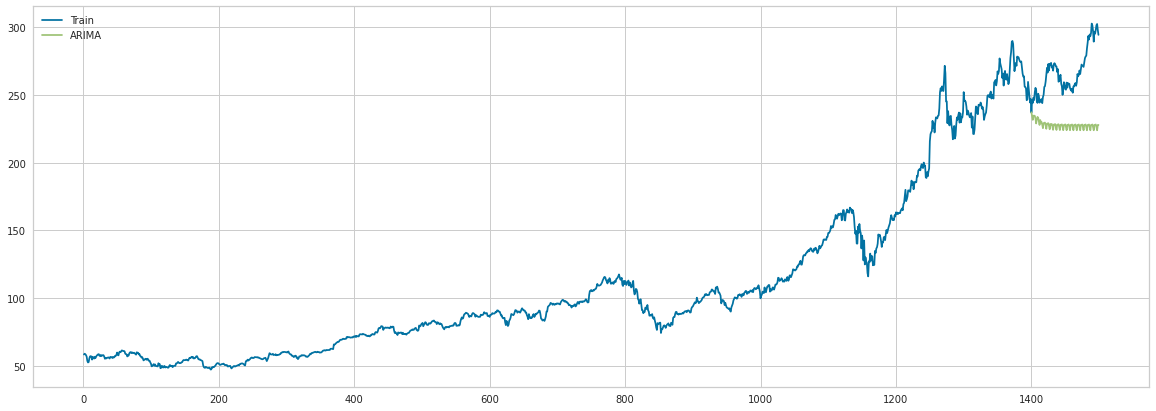

In [63]:
train = df[:1400]
test = df[1400:]
model = SARIMAX(train['Close'], 
                order = (3, 0, 0), 
                seasonal_order =(2, 1, 0, 5))
  
result = model.fit()
result.summary()


start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot( df.iloc[:1499,:]['t'],df.iloc[:1499,:]['Close'], label='Train')
plt.plot(list(range(1400,1500)),predictions, label='ARIMA')
plt.legend(loc='best')

## SARIMAX for m=52 (52 weeks a year)

In [64]:
"""warnings.filterwarnings("ignore")
  
# Fit auto_arima function to dataset
stepwise_fit = auto_arima(train['Close'], start_p = 0, start_q = 0,
                          max_p = 3, max_q = 3, m = 52, 
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()"""

'warnings.filterwarnings("ignore")\n  \n# Fit auto_arima function to dataset\nstepwise_fit = auto_arima(train[\'Close\'], start_p = 0, start_q = 0,\n                          max_p = 3, max_q = 3, m = 52, \n                          start_P = 0, seasonal = True,\n                          d = None, D = 1, trace = True,\n                          error_action =\'ignore\',   # we don\'t want to know if an order does not work\n                          suppress_warnings = True,  # we don\'t want convergence warnings\n                          stepwise = True)           # set to stepwise\n  \n# To print the summary\nstepwise_fit.summary()'

**Trying to find best model for m=52 using the above code crashes the runtime as excessive memory is required and hence we need to use trial and error approach**

After plotting all possible combinations for SARIMAX, the following models give the optimum score

### SARIMAX (0,1,1)(2,1,1)[52]

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41863D+00    |proj g|=  9.97195D-02

At iterate    5    f=  2.34641D+00    |proj g|=  4.15368D-02

At iterate   10    f=  2.33596D+00    |proj g|=  2.51050D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     15      1     0     0   7.770D-06   2.336D+00
  F =   2.3359415680827600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


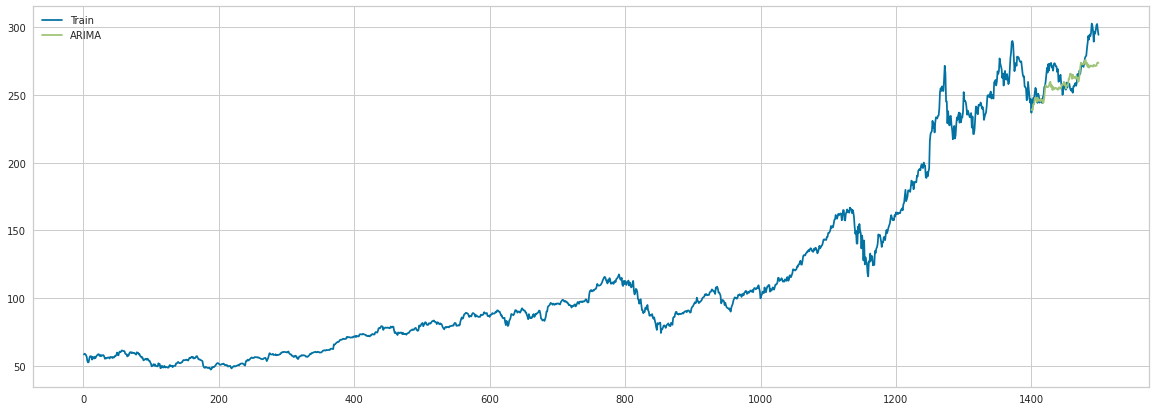

168.69020909282324


In [65]:
#SARIMAX(0,1,1)(2,1,1)
train = df[:1400]
test = df[1400:]
model = SARIMAX(train['Close'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 52))
  
result = model.fit()
result.summary()


start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot( df.iloc[:1499,:]['t'],df.iloc[:1499,:]['Close'], label='Train')
plt.plot(list(range(1400,1500)),predictions, label='ARIMA')
plt.legend(loc='best')
plt.show()

print(mean_squared_error(test['Close'], predictions))

### SARIMAX (2,1,1)(2,1,1)[52]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42099D+00    |proj g|=  9.79969D-02


 This problem is unconstrained.



At iterate    5    f=  2.34563D+00    |proj g|=  3.74939D-02

At iterate   10    f=  2.33593D+00    |proj g|=  1.21684D-03

At iterate   15    f=  2.33592D+00    |proj g|=  1.56501D-04

At iterate   20    f=  2.33588D+00    |proj g|=  5.76086D-03

At iterate   25    f=  2.33235D+00    |proj g|=  1.24830D-02

At iterate   30    f=  2.33053D+00    |proj g|=  4.60418D-04

At iterate   35    f=  2.33052D+00    |proj g|=  2.93896D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     46      1     0     0   1.677D-05   2.331D+00
  F =   2.3305235062924790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

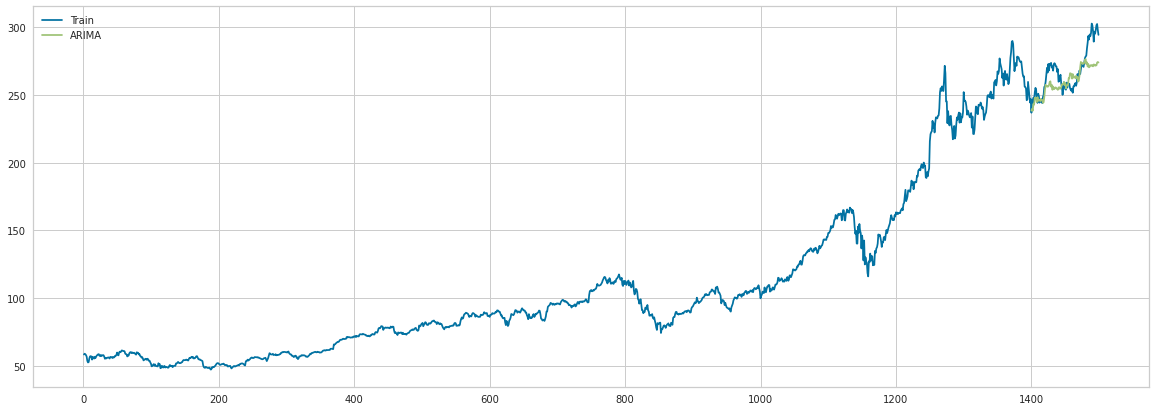

165.28481571682016


In [66]:
#SARIMAX(2,1,1)(2,1,1)
train = df[:1400]
test = df[1400:]
model = SARIMAX(train['Close'], 
                order = (2, 1, 1), 
                seasonal_order =(2, 1, 1, 52))
  
result = model.fit()
result.summary()


start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot( df.iloc[:1499,:]['t'],df.iloc[:1499,:]['Close'], label='Train')
plt.plot(list(range(1400,1500)),predictions, label='ARIMA')
plt.legend(loc='best')
plt.show()

print(mean_squared_error(test['Close'], predictions))

The above model gives an RMSE score of approximately 165.28

### SARIMAX (2,1,1)(2,1,2)[52]

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40742D+00    |proj g|=  1.06900D-01

At iterate    5    f=  2.33651D+00    |proj g|=  8.88053D-03

At iterate   10    f=  2.33585D+00    |proj g|=  2.50090D-04

At iterate   15    f=  2.33582D+00    |proj g|=  2.56579D-03

At iterate   20    f=  2.33553D+00    |proj g|=  1.18672D-02

At iterate   25    f=  2.33459D+00    |proj g|=  1.37313D-02

At iterate   30    f=  2.33181D+00    |proj g|=  3.06736D-03

At iterate   35    f=  2.33161D+00    |proj g|=  1.05588D-03

At iterate   40    f=  2.33140D+00    |proj g|=  1.29974D-02

At iterate   45    f=  2.33076D+00    |proj g|=  6.29491D-03

At iterate   50    f=  2.33053D+00    |proj g|=  9.56975D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

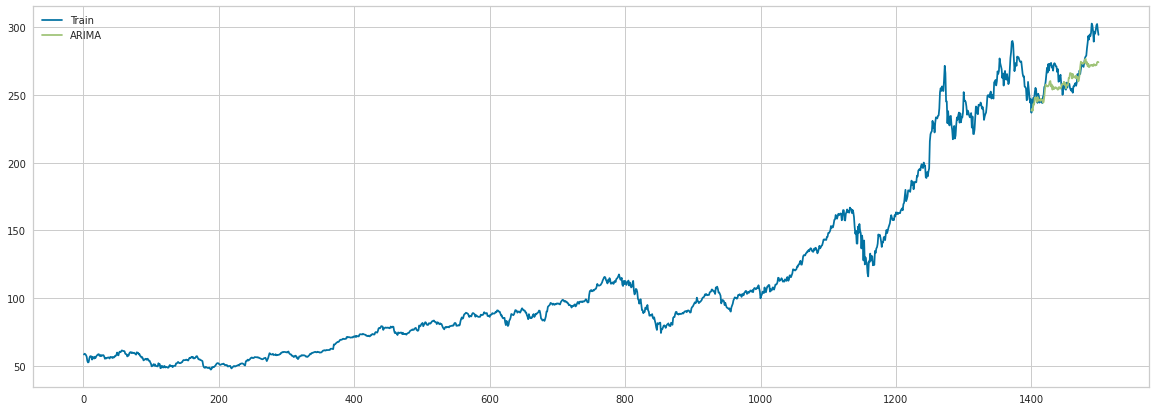

163.23691139945194


In [67]:
#SARIMAX(2,1,1)(2,1,2)
train = df[:1400]
test = df[1400:]
model = SARIMAX(train['Close'], 
                order = (2, 1, 1), 
                seasonal_order =(2, 1, 2, 52))
  
result = model.fit()
result.summary()


start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot( df.iloc[:1499,:]['t'],df.iloc[:1499,:]['Close'], label='Train')
plt.plot(list(range(1400,1500)),predictions, label='ARIMA')
plt.legend(loc='best')
plt.show()

print(mean_squared_error(test['Close'], predictions))

### SARIMAX (2,1,0)(2,1,1)[52]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41804D+00    |proj g|=  9.97017D-02


 This problem is unconstrained.



At iterate    5    f=  2.34498D+00    |proj g|=  3.27458D-02

At iterate   10    f=  2.33591D+00    |proj g|=  8.48547D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     17      1     0     0   3.104D-06   2.336D+00
  F =   2.3359075647420173     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


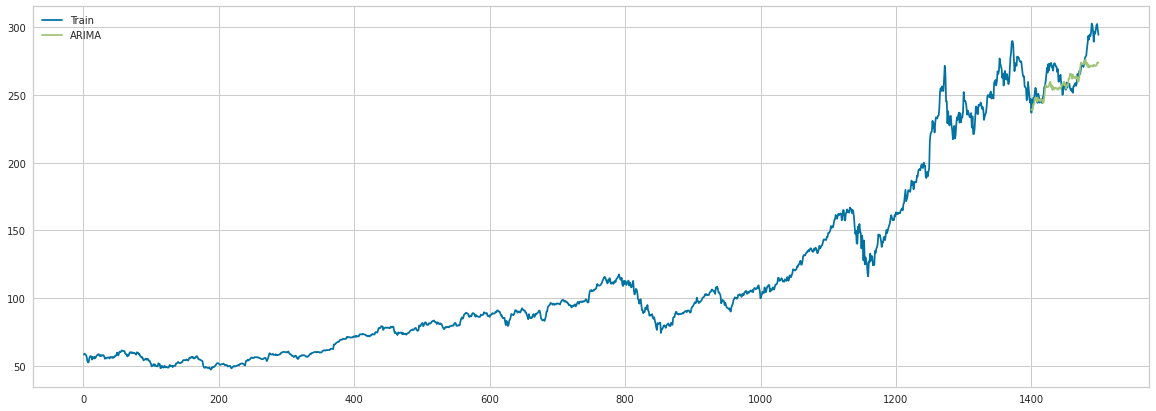

167.98116989765563


In [68]:
#SARIMAX(2,1,0)(2,1,1)
train = df[:1400]
test = df[1400:]
model = SARIMAX(train['Close'], 
                order = (2, 1, 0), 
                seasonal_order =(2, 1, 1, 52))
  
result = model.fit()
result.summary()


start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot( df.iloc[:1499,:]['t'],df.iloc[:1499,:]['Close'], label='Train')
plt.plot(list(range(1400,1500)),predictions, label='ARIMA')
plt.legend(loc='best')
plt.show()

print(mean_squared_error(test['Close'], predictions))

## Double Exponential Smoothing

In [69]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import Holt
model = Holt(df['Close'][:1395]).fit()
pred = model.predict(start=1396, end=1500)

1396    258.948940
1397    259.170304
1398    259.391669
1399    259.613033
1400    259.834397
           ...    
1496    281.085351
1497    281.306715
1498    281.528079
1499    281.749443
1500    281.970808
Length: 105, dtype: float64

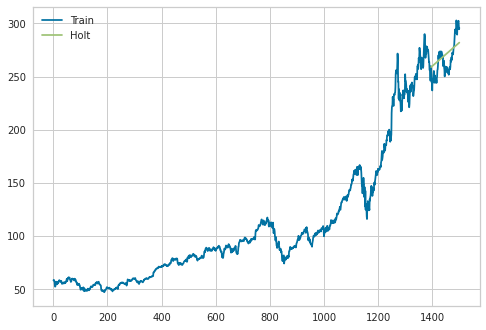

In [70]:
import matplotlib.pyplot as plt
plt.plot( df['t'],df['Close'], label='Train')
plt.plot(list(range(1396,1501)),pred, label='Holt')
plt.legend(loc='best')
pred

**The result of applying double exponential smoothing is shown above**

## Triple Exponential Smoothing

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Training a model on the first 1395 data points 

In [72]:
train, test = df_train.iloc[:1395,5],df_train.iloc[1395:,5]
model_add = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=52).fit()
pred_add = model_add.predict(start=test.index[0], end=test.index[-1])

1395    258.378162
1396    258.780808
1397    258.491097
1398    258.684420
1399    257.954465
           ...    
1495    281.457052
1496    281.727454
1497    282.575767
1498    282.787220
1499    282.674055
Length: 105, dtype: float64

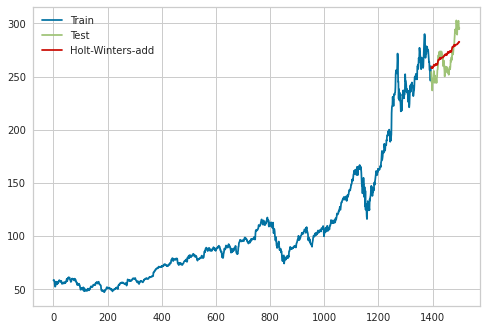

In [73]:
import matplotlib.pyplot as plt
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred_add.index, pred_add, label='Holt-Winters-add')
plt.legend(loc='best')
pred_add

In [74]:
print(mean_squared_error(test, pred_add))

150.35798779973433


Training on the first 1395 points gives an RMSE value of approximately 150.36

In [75]:
pred_add_new30 = model_add.predict(start=1501, end=1530)

1501    282.786990
1502    282.980313
1503    282.250358
1504    282.877944
1505    283.246458
1506    282.821540
1507    284.231405
1508    284.543110
1509    285.494961
1510    285.404174
1511    285.345990
1512    284.394979
1513    285.369757
1514    285.016432
1515    285.598102
1516    286.109353
1517    285.480267
1518    285.953079
1519    285.628024
1520    285.638302
1521    285.307095
1522    285.782891
1523    287.004528
1524    288.384589
1525    289.932599
1526    289.968032
1527    290.291741
1528    290.057378
1529    290.403708
1530    290.901033
dtype: float64

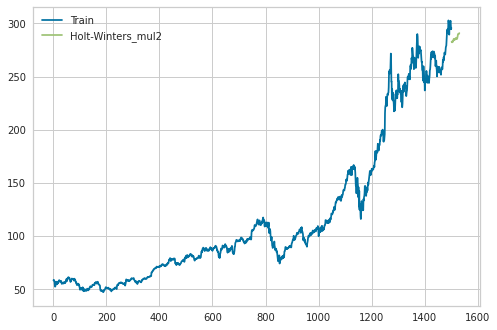

In [76]:
import matplotlib.pyplot as plt
plt.plot( df['t'],df['Close'], label='Train')
plt.plot(list(range(1501,1531)),pred_add_new30, label='Holt-Winters_mul2')
plt.legend(loc='best')
pred_add_new30

### Training a model on the first 1400 data points 

In [77]:
train, test = df_train.iloc[:1400,5],df_train.iloc[1400:,5]
model_add_1400 = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=52).fit()
pred_add_1400 = model_add_1400.predict(start=test.index[0], end=test.index[-1])

1400    238.435965
1401    238.714123
1402    238.198659
1403    239.518204
1404    239.740064
           ...    
1495    251.993782
1496    252.175955
1497    252.936295
1498    253.059746
1499    252.712919
Length: 100, dtype: float64

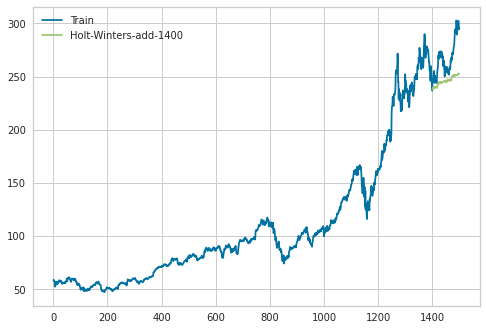

In [78]:
import matplotlib.pyplot as plt
plt.plot( df['t'],df['Close'], label='Train')
plt.plot(pred_add_1400.index, pred_add_1400, label='Holt-Winters-add-1400')
plt.legend(loc='best')
pred_add_1400

In [79]:
print(mean_squared_error(test, pred_add_1400))
pred_add_1400_new30 = model_add_1400.predict(start=1501, end=1530)

626.6242359929751


Training on the first 1400 points gives an RMSE value of approximately 626.63 which is not an improvement of the previous score

1501    252.277961
1502    252.471890
1503    251.307741
1504    251.878930
1505    252.157087
1506    251.641624
1507    252.961168
1508    253.183028
1509    254.042206
1510    253.858923
1511    253.708323
1512    252.664804
1513    253.547385
1514    253.101819
1515    253.591716
1516    254.011132
1517    253.290307
1518    253.671461
1519    253.254721
1520    253.173822
1521    252.751306
1522    253.135644
1523    254.266114
1524    255.555256
1525    257.012362
1526    256.957088
1527    257.190257
1528    256.865382
1529    257.121197
1530    257.528177
dtype: float64

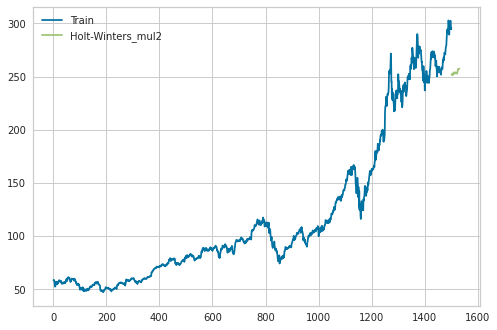

In [80]:
import matplotlib.pyplot as plt
plt.plot( df['t'],df['Close'], label='Train')
plt.plot(list(range(1501,1531)),pred_add_1400_new30, label='Holt-Winters_mul2')
plt.legend(loc='best')
pred_add_1400_new30

The above plot shows the predicted values of the 30 data points of the test data. As we can see, we do not obtain a good prediction

### Training a model on the first 1420 data points

In [81]:
train, test = df_train.iloc[:1420,5],df_train.iloc[1420:,5]
model_add_1420 = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=52).fit()
pred_add_1420 = model_add_1420.predict(start=test.index[0], end=test.index[-1])

1420    257.892184
1421    259.349349
1422    259.294113
1423    259.527334
1424    259.202621
           ...    
1495    268.351726
1496    268.533603
1497    269.293301
1498    269.416365
1499    269.069068
Length: 80, dtype: float64

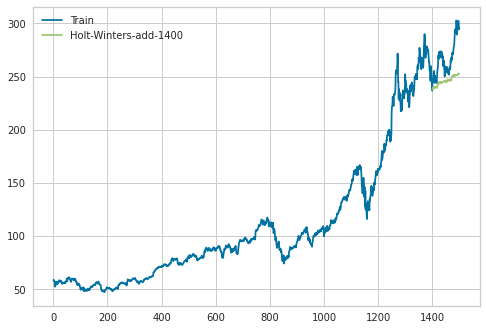

In [82]:
import matplotlib.pyplot as plt
plt.plot( df['t'],df['Close'], label='Train')
plt.plot(pred_add_1400.index, pred_add_1400, label='Holt-Winters-add-1400')
plt.legend(loc='best')
pred_add_1420

In [83]:
print(mean_squared_error(test, pred_add_1420))
pred_add_1420_new30 = model_add_1420.predict(start=1501, end=1530)

233.00062841800786


Training on the first 1420 points gives an RMSE value of approximately 233, which is not an improvement of the best score yet

1501    268.633400
1502    268.826864
1503    267.662631
1504    268.528586
1505    268.714267
1506    268.364285
1507    269.566491
1508    269.999480
1509    270.940321
1510    270.705770
1511    270.259569
1512    269.215223
1513    270.308694
1514    269.818814
1515    270.116722
1516    270.556978
1517    269.906223
1518    270.286848
1519    269.779099
1520    269.861423
1521    269.514641
1522    270.091870
1523    271.204257
1524    272.493192
1525    273.950357
1526    273.895121
1527    274.128342
1528    273.803629
1529    274.059682
1530    274.466717
dtype: float64

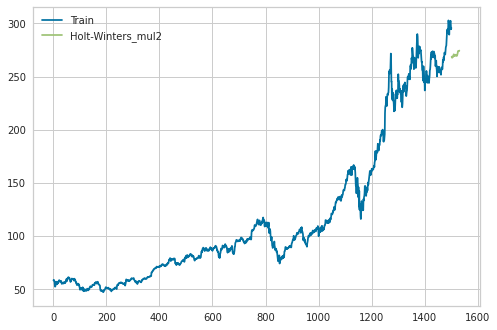

In [84]:
import matplotlib.pyplot as plt
plt.plot( df['t'],df['Close'], label='Train')
plt.plot(list(range(1501,1531)),pred_add_1420_new30, label='Holt-Winters_mul2')
plt.legend(loc='best')
pred_add_1420_new30

The above plot shows the predicted values of the 30 data points of the test data. As we can see, we do not obtain a good prediction

Comparing Regression and Time Series Models, it was observed that Regression Models give a better RMSE Score. The Regression model also handles the fluctuations in the data better and thus in conclusion it was decided that the Regression Model is more suitable for the given data .